<a href="https://colab.research.google.com/github/Viplaws/Tug-eeg-epilepsy/blob/master/Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy

Accuracy: 0.884
Precision: 0.8843
Recall: 0.884
F1 Score: 0.8839
Cohen Kappa Score: 1.0
Matthews Corrcoef: 1.0
		Classification Report:
               precision    recall  f1-score   support

    Epilepsy       0.87      0.89      0.88       476
 No_epilepsy       0.90      0.87      0.89       524

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



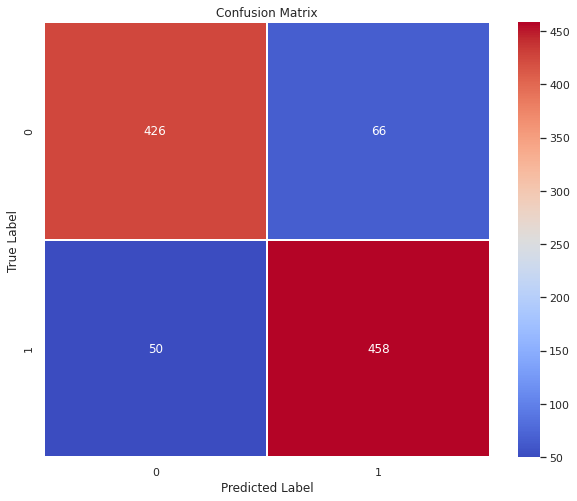

In [3]:
"""
Example 4.3. The following PYTHON code is used to extract features from the 
EEG signals using Wavelet Packet Decomposition (WPD). Then it uses statistical 
values of WPD subbands. Then it classifies these data using k-Nearest Neighbour
 (k-NN) classifier. You can download data from the following web site:
http://epileptologie-bonn.de/cms/front_content.php?idcat=193&lang=3&changelang=3

Created on Wed Apr 24 20:25:39 2019
@author: subasi
"""
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.io as sio
# descriptive statistics
import scipy as sp
import scipy.stats as stats
import pywt
import numpy
db1 = pywt.Wavelet('db1')
mat_contents = sio.loadmat('final.mat')
sorted(mat_contents.keys())

Epilepsy=mat_contents['Epilepsy']
No_epilepsy=mat_contents['No_epilepsy']
temp_list = []

######################################################
#coeff = pywt.wavedec(Normal_Eyes_Open[:,1], waveletname, level)
###############################
"""Extract The Coeeficients"""
Length = 4096;    # Length of signal
Nofsignal=2000; #Number of Signal
#numrows = len(No_epilepsy)   
numrows =83 #Number of features extracted from DWT decomposition 
numcols = len(No_epilepsy[0]) 
#rms = np.sqrt(np.mean(y**2))

###############################
"""Extract The Coeeficients"""
Extracted_Features=np.ndarray(shape=(2*numcols,numrows), dtype=float, order='F')

"""NORMAL EEG SIGNAL"""  

for i in range(numcols):
    wp= pywt.WaveletPacket(No_epilepsy[:,i], db1, mode='symmetric', maxlevel=6)
    Extracted_Features[i,0]=sp.mean(abs(wp['a'].data))
    Extracted_Features[i,1]=sp.mean(abs(wp['aa'].data))
    Extracted_Features[i,2]=sp.mean(abs(wp['aaa'].data))
    Extracted_Features[i,3]=sp.mean(abs(wp['aaaa'].data))
    Extracted_Features[i,4]=sp.mean(abs(wp['aaaaa'].data))
    Extracted_Features[i,5]=sp.mean(abs(wp['aaaaaa'].data))
    Extracted_Features[i,6]=sp.mean(abs(wp['d'].data))
    Extracted_Features[i,7]=sp.mean(abs(wp['dd'].data))
    Extracted_Features[i,8]=sp.mean(abs(wp['ddd'].data))
    Extracted_Features[i,9]=sp.mean(abs(wp['dddd'].data))
    Extracted_Features[i,10]=sp.mean(abs(wp['ddddd'].data))
    Extracted_Features[i,11]=sp.mean(abs(wp['dddddd'].data))

    Extracted_Features[i,12]=sp.std(wp['a'].data)
    Extracted_Features[i,13]=sp.std(wp['aa'].data)
    Extracted_Features[i,14]=sp.std(wp['aaa'].data)
    Extracted_Features[i,15]=sp.std(wp['aaaa'].data)
    Extracted_Features[i,16]=sp.std(wp['aaaaa'].data)
    Extracted_Features[i,17]=sp.std(wp['aaaaaa'].data)
    Extracted_Features[i,18]=sp.std(wp['d'].data)
    Extracted_Features[i,19]=sp.std(wp['dd'].data)
    Extracted_Features[i,20]=sp.std(wp['ddd'].data)
    Extracted_Features[i,21]=sp.std(wp['dddd'].data)
    Extracted_Features[i,22]=sp.std(wp['ddddd'].data)
    Extracted_Features[i,23]=sp.std(wp['dddddd'].data)

    Extracted_Features[i,24]=sp.median(wp['a'].data)
    Extracted_Features[i,25]=sp.median(wp['aa'].data)
    Extracted_Features[i,26]=sp.median(wp['aaa'].data)
    Extracted_Features[i,27]=sp.median(wp['aaaa'].data)
    Extracted_Features[i,28]=sp.median(wp['aaaaa'].data)
    Extracted_Features[i,29]=sp.median(wp['aaaaaa'].data)
    Extracted_Features[i,30]=sp.median(wp['d'].data)
    Extracted_Features[i,31]=sp.median(wp['dd'].data)
    Extracted_Features[i,32]=sp.median(wp['ddd'].data)
    Extracted_Features[i,33]=sp.median(wp['dddd'].data)
    Extracted_Features[i,34]=sp.median(wp['ddddd'].data)
    Extracted_Features[i,35]=sp.median(wp['dddddd'].data)
    
    Extracted_Features[i,36]=stats.skew(wp['a'].data)
    Extracted_Features[i,37]=stats.skew(wp['aa'].data)
    Extracted_Features[i,38]=stats.skew(wp['aaa'].data)
    Extracted_Features[i,39]=stats.skew(wp['aaaa'].data)
    Extracted_Features[i,40]=stats.skew(wp['aaaaa'].data)
    Extracted_Features[i,41]=stats.skew(wp['aaaaaa'].data)
    Extracted_Features[i,42]=stats.skew(wp['d'].data)
    Extracted_Features[i,43]=stats.skew(wp['dd'].data)
    Extracted_Features[i,44]=stats.skew(wp['ddd'].data)
    Extracted_Features[i,45]=stats.skew(wp['dddd'].data)
    Extracted_Features[i,46]=stats.skew(wp['ddddd'].data)
    Extracted_Features[i,47]=stats.skew(wp['dddddd'].data)
    
    Extracted_Features[i,48]=stats.kurtosis(wp['a'].data)
    Extracted_Features[i,49]=stats.kurtosis(wp['aa'].data)
    Extracted_Features[i,50]=stats.kurtosis(wp['aaa'].data)
    Extracted_Features[i,51]=stats.kurtosis(wp['aaaa'].data)
    Extracted_Features[i,52]=stats.kurtosis(wp['aaaaa'].data)
    Extracted_Features[i,53]=stats.kurtosis(wp['aaaaaa'].data)
    Extracted_Features[i,54]=stats.kurtosis(wp['d'].data)
    Extracted_Features[i,55]=stats.kurtosis(wp['dd'].data)
    Extracted_Features[i,56]=stats.kurtosis(wp['ddd'].data)
    Extracted_Features[i,57]=stats.kurtosis(wp['dddd'].data)
    Extracted_Features[i,58]=stats.kurtosis(wp['ddddd'].data)
    Extracted_Features[i,59]=stats.kurtosis(wp['dddddd'].data)
    
    Extracted_Features[i,60]=np.sqrt(np.mean(wp['a'].data**2))   #RMS Value
    Extracted_Features[i,61]=np.sqrt(np.mean(wp['aa'].data**2))
    Extracted_Features[i,62]=np.sqrt(np.mean(wp['aaa'].data**2))
    Extracted_Features[i,63]=np.sqrt(np.mean(wp['aaaa'].data**2))
    Extracted_Features[i,64]=np.sqrt(np.mean(wp['aaaaa'].data**2))
    Extracted_Features[i,65]=np.sqrt(np.mean(wp['aaaaaa'].data**2))
    Extracted_Features[i,66]=np.sqrt(np.mean(wp['d'].data**2))
    Extracted_Features[i,67]=np.sqrt(np.mean(wp['dd'].data**2))
    Extracted_Features[i,68]=np.sqrt(np.mean(wp['ddd'].data**2))
    Extracted_Features[i,69]=np.sqrt(np.mean(wp['dddd'].data**2))
    Extracted_Features[i,70]=np.sqrt(np.mean(wp['ddddd'].data**2))
    Extracted_Features[i,71]=np.sqrt(np.mean(wp['dddddd'].data**2))
    
    Extracted_Features[i,72]=sp.mean(abs(wp['a'].data))/sp.mean(abs(wp['aa'].data))
    Extracted_Features[i,73]=sp.mean(abs(wp['aa'].data))/sp.mean(abs(wp['aaa'].data))
    Extracted_Features[i,74]=sp.mean(abs(wp['aaa'].data))/sp.mean(abs(wp['aaaa'].data))
    Extracted_Features[i,75]=sp.mean(abs(wp['aaaa'].data))/sp.mean(abs(wp['aaaaa'].data))
    Extracted_Features[i,76]=sp.mean(abs(wp['aaaaa'].data))/sp.mean(abs(wp['aaaaaa'].data))
    Extracted_Features[i,77]=sp.mean(abs(wp['aaaaaa'].data))/sp.mean(abs(wp['d'].data))
    Extracted_Features[i,78]=sp.mean(abs(wp['d'].data))/sp.mean(abs(wp['dd'].data))
    Extracted_Features[i,79]=sp.mean(abs(wp['dd'].data))/sp.mean(abs(wp['ddd'].data))
    Extracted_Features[i,80]=sp.mean(abs(wp['ddd'].data))/sp.mean(abs(wp['dddd'].data))
    Extracted_Features[i,81]=sp.mean(abs(wp['dddd'].data))/sp.mean(abs(wp['ddddd'].data))
    Extracted_Features[i,82]=sp.mean(abs(wp['ddddd'].data))/sp.mean(abs(wp['dddddd'].data))
    
    temp_list.append("No_epilepsy")
    
"""INTERICTAL EEG SIGNAL"""  

for i in range(numcols, 2*numcols):
    wp= pywt.WaveletPacket(Epilepsy[:,i-numcols], db1, mode='symmetric', maxlevel=6)
    Extracted_Features[i,0]=sp.mean(abs(wp['a'].data))
    Extracted_Features[i,1]=sp.mean(abs(wp['aa'].data))
    Extracted_Features[i,2]=sp.mean(abs(wp['aaa'].data))
    Extracted_Features[i,3]=sp.mean(abs(wp['aaaa'].data))
    Extracted_Features[i,4]=sp.mean(abs(wp['aaaaa'].data))
    Extracted_Features[i,5]=sp.mean(abs(wp['aaaaaa'].data))
    Extracted_Features[i,6]=sp.mean(abs(wp['d'].data))
    Extracted_Features[i,7]=sp.mean(abs(wp['dd'].data))
    Extracted_Features[i,8]=sp.mean(abs(wp['ddd'].data))
    Extracted_Features[i,9]=sp.mean(abs(wp['dddd'].data))
    Extracted_Features[i,10]=sp.mean(abs(wp['ddddd'].data))
    Extracted_Features[i,11]=sp.mean(abs(wp['dddddd'].data))

    Extracted_Features[i,12]=sp.std(wp['a'].data)
    Extracted_Features[i,13]=sp.std(wp['aa'].data)
    Extracted_Features[i,14]=sp.std(wp['aaa'].data)
    Extracted_Features[i,15]=sp.std(wp['aaaa'].data)
    Extracted_Features[i,16]=sp.std(wp['aaaaa'].data)
    Extracted_Features[i,17]=sp.std(wp['aaaaaa'].data)
    Extracted_Features[i,18]=sp.std(wp['d'].data)
    Extracted_Features[i,19]=sp.std(wp['dd'].data)
    Extracted_Features[i,20]=sp.std(wp['ddd'].data)
    Extracted_Features[i,21]=sp.std(wp['dddd'].data)
    Extracted_Features[i,22]=sp.std(wp['ddddd'].data)
    Extracted_Features[i,23]=sp.std(wp['dddddd'].data)

    Extracted_Features[i,24]=sp.median(wp['a'].data)
    Extracted_Features[i,25]=sp.median(wp['aa'].data)
    Extracted_Features[i,26]=sp.median(wp['aaa'].data)
    Extracted_Features[i,27]=sp.median(wp['aaaa'].data)
    Extracted_Features[i,28]=sp.median(wp['aaaaa'].data)
    Extracted_Features[i,29]=sp.median(wp['aaaaaa'].data)
    Extracted_Features[i,30]=sp.median(wp['d'].data)
    Extracted_Features[i,31]=sp.median(wp['dd'].data)
    Extracted_Features[i,32]=sp.median(wp['ddd'].data)
    Extracted_Features[i,33]=sp.median(wp['dddd'].data)
    Extracted_Features[i,34]=sp.median(wp['ddddd'].data)
    Extracted_Features[i,35]=sp.median(wp['dddddd'].data)
    
    Extracted_Features[i,36]=stats.skew(wp['a'].data)
    Extracted_Features[i,37]=stats.skew(wp['aa'].data)
    Extracted_Features[i,38]=stats.skew(wp['aaa'].data)
    Extracted_Features[i,39]=stats.skew(wp['aaaa'].data)
    Extracted_Features[i,40]=stats.skew(wp['aaaaa'].data)
    Extracted_Features[i,41]=stats.skew(wp['aaaaaa'].data)
    Extracted_Features[i,42]=stats.skew(wp['d'].data)
    Extracted_Features[i,43]=stats.skew(wp['dd'].data)
    Extracted_Features[i,44]=stats.skew(wp['ddd'].data)
    Extracted_Features[i,45]=stats.skew(wp['dddd'].data)
    Extracted_Features[i,46]=stats.skew(wp['ddddd'].data)
    Extracted_Features[i,47]=stats.skew(wp['dddddd'].data)
    
    Extracted_Features[i,48]=stats.kurtosis(wp['a'].data)
    Extracted_Features[i,49]=stats.kurtosis(wp['aa'].data)
    Extracted_Features[i,50]=stats.kurtosis(wp['aaa'].data)
    Extracted_Features[i,51]=stats.kurtosis(wp['aaaa'].data)
    Extracted_Features[i,52]=stats.kurtosis(wp['aaaaa'].data)
    Extracted_Features[i,53]=stats.kurtosis(wp['aaaaaa'].data)
    Extracted_Features[i,54]=stats.kurtosis(wp['d'].data)
    Extracted_Features[i,55]=stats.kurtosis(wp['dd'].data)
    Extracted_Features[i,56]=stats.kurtosis(wp['ddd'].data)
    Extracted_Features[i,57]=stats.kurtosis(wp['dddd'].data)
    Extracted_Features[i,58]=stats.kurtosis(wp['ddddd'].data)
    Extracted_Features[i,59]=stats.kurtosis(wp['dddddd'].data)
    
    Extracted_Features[i,60]=np.sqrt(np.mean(wp['a'].data**2))   #RMS Value
    Extracted_Features[i,61]=np.sqrt(np.mean(wp['aa'].data**2))
    Extracted_Features[i,62]=np.sqrt(np.mean(wp['aaa'].data**2))
    Extracted_Features[i,63]=np.sqrt(np.mean(wp['aaaa'].data**2))
    Extracted_Features[i,64]=np.sqrt(np.mean(wp['aaaaa'].data**2))
    Extracted_Features[i,65]=np.sqrt(np.mean(wp['aaaaaa'].data**2))
    Extracted_Features[i,66]=np.sqrt(np.mean(wp['d'].data**2))
    Extracted_Features[i,67]=np.sqrt(np.mean(wp['dd'].data**2))
    Extracted_Features[i,68]=np.sqrt(np.mean(wp['ddd'].data**2))
    Extracted_Features[i,69]=np.sqrt(np.mean(wp['dddd'].data**2))
    Extracted_Features[i,70]=np.sqrt(np.mean(wp['ddddd'].data**2))
    Extracted_Features[i,71]=np.sqrt(np.mean(wp['dddddd'].data**2))
    
    Extracted_Features[i,72]=sp.mean(abs(wp['a'].data))/sp.mean(abs(wp['aa'].data))
    Extracted_Features[i,73]=sp.mean(abs(wp['aa'].data))/sp.mean(abs(wp['aaa'].data))
    Extracted_Features[i,74]=sp.mean(abs(wp['aaa'].data))/sp.mean(abs(wp['aaaa'].data))
    Extracted_Features[i,75]=sp.mean(abs(wp['aaaa'].data))/sp.mean(abs(wp['aaaaa'].data))
    Extracted_Features[i,76]=sp.mean(abs(wp['aaaaa'].data))/sp.mean(abs(wp['aaaaaa'].data))
    Extracted_Features[i,77]=sp.mean(abs(wp['aaaaaa'].data))/sp.mean(abs(wp['d'].data))
    Extracted_Features[i,78]=sp.mean(abs(wp['d'].data))/sp.mean(abs(wp['dd'].data))
    Extracted_Features[i,79]=sp.mean(abs(wp['dd'].data))/sp.mean(abs(wp['ddd'].data))
    Extracted_Features[i,80]=sp.mean(abs(wp['ddd'].data))/sp.mean(abs(wp['dddd'].data))
    Extracted_Features[i,81]=sp.mean(abs(wp['dddd'].data))/sp.mean(abs(wp['ddddd'].data))
    Extracted_Features[i,82]=sp.mean(abs(wp['ddddd'].data))/sp.mean(abs(wp['dddddd'].data))
    
    temp_list.append("Epilepsy")

"""ICTAL EEG SIGNAL"""  
    
"""CLASSIFICATION"""
X = Extracted_Features
y = temp_list
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=0)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix


clf = AdaBoostClassifier(n_estimators=50,learning_rate=1)
clf.fit(Xtrain,ytrain)
ypred = clf.predict(Xtest)

from sklearn import metrics
print('Accuracy:', np.round(metrics.accuracy_score(ytest,ypred),4))
print('Precision:', np.round(metrics.precision_score(ytest, 
                            ypred,average='weighted'),4))
print('Recall:', np.round(metrics.recall_score(ytest,ypred,
                                               average='weighted'),4))
print('F1 Score:', np.round(
                        metrics.f1_score(ytest,ypred,
                                               average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(ytest, ypred)))
print('Matthews Corrcoef:', np.round(metrics.matthews_corrcoef(ytest, ypred))) 
print('\t\tClassification Report:\n', metrics.classification_report(ypred, ytest))
matrix = confusion_matrix(ytest, ypred)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix,cmap='coolwarm',linecolor='white',linewidths=1,
            annot=True,
            fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
